### <center> Data Preparation

#### Importing and Organising Dataset

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

# Visualisation module
import matplotlib.pyplot as plt # Chart plotting
from mplcursors import cursor # Hover annotation

# importing the market data
data = pd.read_csv('G:/My Drive/PRIBADI/SKILL LEARNING/ANALISIS SAHAM/IHSG_data.csv')

In [4]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,12/21/2000,415.086823,415.102997,415.178986,410.938995,414.528015,2059800
1,12/22/2000,416.304810,416.321014,418.815002,412.532013,414.317993,2050800
2,1/2/2001,410.189026,410.204987,415.372009,407.596985,415.372009,843700
3,1/3/2001,405.813202,405.829010,409.601013,402.381989,409.601013,1825000
4,1/4/2001,409.811066,409.826996,409.957001,405.270996,407.269989,3289300


In [5]:
# Checking data completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5898 non-null   object 
 1   Adj Close  5898 non-null   float64
 2   Close      5898 non-null   float64
 3   High       5898 non-null   float64
 4   Low        5898 non-null   float64
 5   Open       5898 non-null   float64
 6   Volume     5898 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 322.7+ KB


In [6]:
# Converting Date data type
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    data.set_index('Date', inplace=True)

# Checkpoint: checking date index conversion
print('\n Date index after processing the Date column:')
print(data.head())


 Date index after processing the Date column:
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2000-12-21  415.086823  415.102997  415.178986  410.938995  414.528015   
2000-12-22  416.304810  416.321014  418.815002  412.532013  414.317993   
2001-01-02  410.189026  410.204987  415.372009  407.596985  415.372009   
2001-01-03  405.813202  405.829010  409.601013  402.381989  409.601013   
2001-01-04  409.811066  409.826996  409.957001  405.270996  407.269989   

             Volume  
Date                 
2000-12-21  2059800  
2000-12-22  2050800  
2001-01-02   843700  
2001-01-03  1825000  
2001-01-04  3289300  


#### Preparing the calculation and filtering

In [8]:
# Calculating market's daily return and create a new column within the DataFrame
data['Daily_Return'] = data['Close'].pct_change() * 100
data['Daily_Return'].head()

Date
2000-12-21         NaN
2000-12-22    0.293425
2001-01-02   -1.469065
2001-01-03   -1.066778
2001-01-04    0.985140
Name: Daily_Return, dtype: float64

In [9]:
# Checking the updated DataFrame
data.tail()

,Adj Close,Close,High,Low,Open,Volume,Daily_Return
Date,,,,,,,
2025-03-26,6472.355957,6472.355957,6489.148926,6312.966797,6314.329102,159762700,3.796525
2025-03-27,6510.620117,6510.620117,6510.620117,6417.240234,6462.596191,121855500,0.591194
2025-04-08,5996.142090,5996.142090,6036.554199,5882.604980,5914.288086,184790800,-7.902136
2025-04-09,5967.987793,5967.987793,6092.412109,5949.601074,5978.440918,150044400,-0.469540
2025-04-10,6254.023926,6254.023926,0.000000,0.000000,0.000000,0,4.792840


In [10]:
# Define a threshold for a daily crash (drop more than 6%)
daily_crash_threshold = -6
data['Daily_Crash'] = data['Daily_Return'] <= daily_crash_threshold

# Fiter and display rows when daily crashses occurred
daily_crashes = data.loc[data['Daily_Crash'], :]
print(daily_crashes)

              Adj Close        Close         High          Low         Open  \
Date                                                                          
2002-10-14   337.461853   337.475006   370.915009   334.730988   370.915009   
2004-05-17   668.450989   668.476990   718.578003   665.958984   718.578003   
2006-05-15  1429.486450  1429.541992  1497.031982  1427.050049  1497.031982   
2006-05-22  1308.994141  1309.045044  1397.417969  1304.344971  1395.961060   
2007-08-15  2029.004028  2029.083008  2121.937012  2019.636963  2121.937012   
2008-01-22  2294.434570  2294.523926  2375.882080  2229.819092  2375.882080   
2008-10-06  1648.674805  1648.739014  1766.935059  1634.545044  1766.935059   
2008-10-08  1451.612427  1451.668945  1565.738037  1451.668945  1565.021973   
2008-10-24  1244.815552  1244.864014  1306.766968  1239.291016  1306.766968   
2008-10-27  1166.363770  1166.409058  1185.555054  1157.197998  1185.555054   
2011-09-22  3369.012207  3369.143066  3695.937012  3

In [11]:
# Checkpoint - checking if any rows are empty
print(f'Data shape: {data.shape}')
print(f'Null Close prices: {data['Close'].isna().sum()}')

Data shape: (5898, 8)
Null Close prices: 0


### <center> Plotting the Chart - Daily Crashes and Drawdowns

#### Highlighting daily crashes

Plot the movement of IHSG daily closing price along the years in a line chart, then mark the dates where crashes occur. 

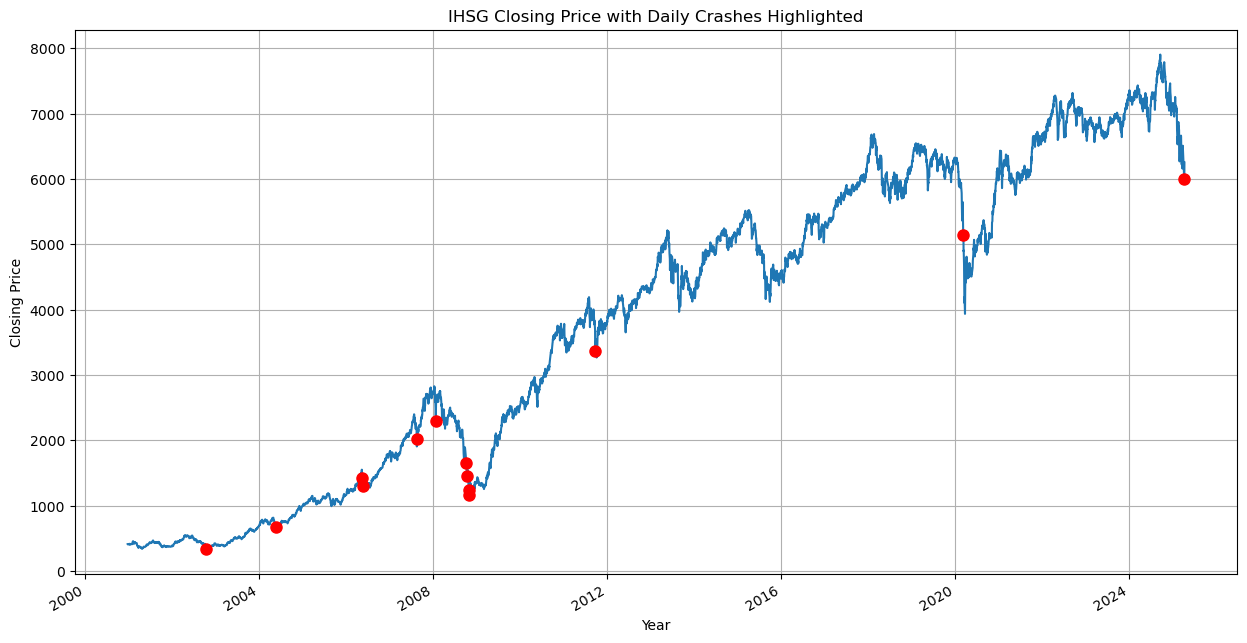

In [15]:
# Plot the chart
data['Close'].plot(markevery=data['Daily_Crash'], 
                   marker='o', ms = 8, mec='r', mfc='r',
                  figsize=(15, 8))

# Give label to the chart
plt.title('IHSG Closing Price with Daily Crashes Highlighted')
plt.xlabel('Year')
plt.ylabel('Closing Price')

plt.grid()
plt.show()

#### Highlighting Drawdowns - Market Stress

<center> Finding the highest value over time and the percentage drop from it.</center><br>
This was done by calculating the cumulative maximum and drawdown (percentage drop from cumulative maximum).<br><br>
> data['Cumulative_Max'] should show the maximum amount the index ever reached.<br>
> data['Drawdown'] should show the value change (in percentage) for each day with respect to the last highest value.

In [18]:
# Calculate cumulative max and drawdown (% drop from the cumulative max)
data['Cumulative_Max'] = data['Close'].cummax()
data['Drawdown'] = (data['Close'] - data['Cumulative_Max']) / data['Cumulative_Max'] * 100

# Checkpoint - checking the calculation's result
print(data['Cumulative_Max'].tail())
print(data['Drawdown'].tail())

Date
2025-03-26    7905.390137
2025-03-27    7905.390137
2025-04-08    7905.390137
2025-04-09    7905.390137
2025-04-10    7905.390137
Name: Cumulative_Max, dtype: float64
Date
2025-03-26   -18.127305
2025-03-27   -17.643279
2025-04-08   -24.151219
2025-04-09   -24.507359
2025-04-10   -20.889117
Name: Drawdown, dtype: float64


In [19]:
data.head(1)

,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Daily_Crash,Cumulative_Max,Drawdown
Date,,,,,,,,,,
2000-12-21,415.086823,415.102997,415.178986,410.938995,414.528015,2059800,NaN,False,415.102997,0.0


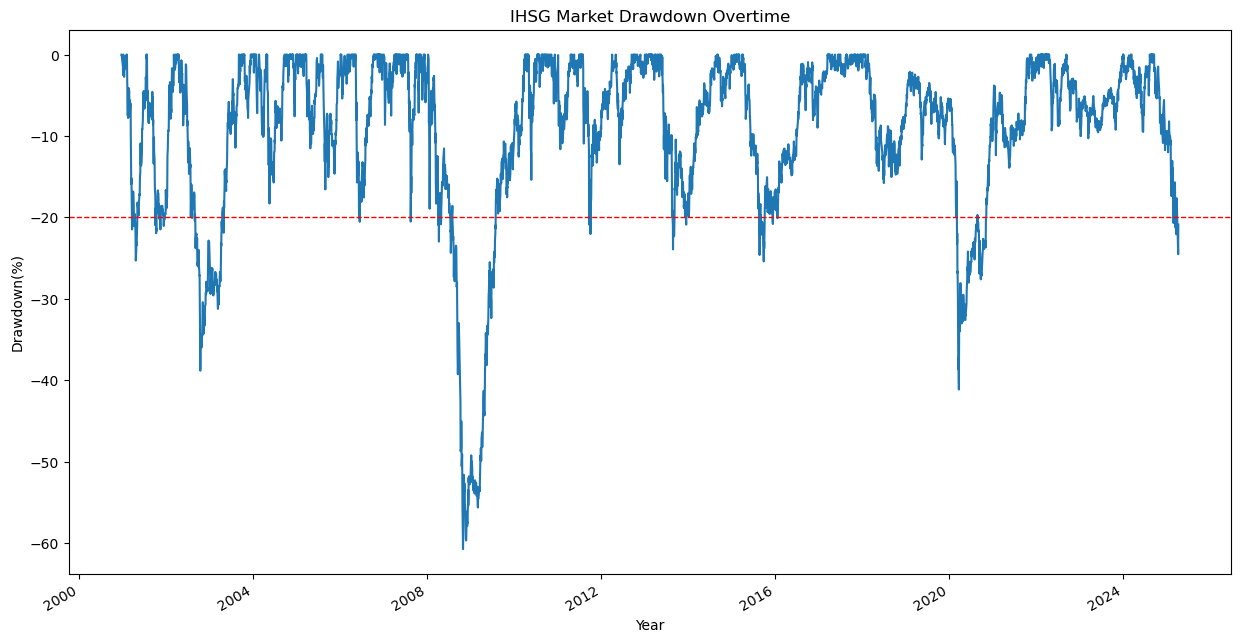

In [23]:
# Highlighting the drawdowns overtime
drawdown_threshold = -20 # Defining threshold mark at 20%

# Plot the chart
data['Drawdown'].plot(figsize=(15, 8))

# Mark the Drawdown Threshold
plt.axhline(y=-20, color='r', linestyle='dashed', linewidth=1)

cursor(hover=True)

# Give label to the chart
plt.title('IHSG Market Drawdown Overtime')
plt.xlabel('Year')
plt.ylabel('Drawdown(%)')

plt.show()

Market Drawdowns were consistent with major crashes in global context.<br><br>
1. 2002 Dot-com bubble crash
2. 2008 Stock market crash
3. 2020, March, Covid-19 onset
4. 2025 USA initiation of high Tariff globally


<p>Although in 2025 there was a visible steady decline coinciding with the political unrest in Indonesia at the time, with various harsh critics from the public regarding President Prabowo's stance in his economic policy and response regarding demonstrations/protests that had been happening in diverse forms and topics across the Indonesia. </p>
<br>
Let's identify specifically when and to what magnitude did these major crashes occur. I sorted the Drawdown's value (%) in Descending order to display time period that indicates severe market stress:

In [26]:
# Displaying specific rows where major Crashes happen

crash_drawdowns = data[data['Drawdown'] <= drawdown_threshold]
print('Dates where Major Crashes happen:\n')
print(crash_drawdowns[['Close', 'Cumulative_Max', 'Drawdown']].dropna().sort_values(by='Drawdown'))

Dates where Major Crashes happen:

                  Close  Cumulative_Max   Drawdown
Date                                              
2008-10-28  1111.390015     2830.262939 -60.731916
2008-10-29  1113.624023     2830.262939 -60.652984
2008-11-24  1141.401001     2830.262939 -59.671556
2008-11-21  1146.276001     2830.262939 -59.499311
2008-11-25  1154.140991     2830.262939 -59.221422
...                 ...             ...        ...
2006-06-15  1241.650024     1553.062012 -20.051484
2013-08-23  4169.827148     5214.976074 -20.041299
2013-08-22  4171.413086     5214.976074 -20.010887
2001-03-19   367.141998      458.951996 -20.004270
2001-04-11   367.156006      458.951996 -20.001218

[660 rows x 3 columns]


### <center> Analyzing Periods of Crashses

In [29]:
crash_dates = data.index[data['Drawdown'] <= drawdown_threshold] # Assign a variable to values below the drawdown threshold.
clusters = [] # Create an empty list to fill with identified clusters later
current_cluster = [] # Create an empty list

# Create a For loop to set the condition and fill the blank list
for date in crash_dates:
    if not current_cluster:
        current_cluster.append(date)
    else:
        if (date - current_cluster[-1]).days <= 3:
            current_cluster.append(date)
        else:
            clusters.append(current_cluster)
            current_cluster = [date]
if current_cluster:
    clusters.append(current_cluster)

print('Identified crash clusters based on drawdown threshold: \n')
for idx, cluster in enumerate(clusters):
    print(f'Cluster {idx+1}: {cluster[0].date()} to {cluster[-1].date()} (Total days: {len(cluster)})')

Identified crash clusters based on drawdown threshold: 

Cluster 1: 2001-03-19 to 2001-03-22 (Total days: 3)
Cluster 2: 2001-04-05 to 2001-04-12 (Total days: 5)
Cluster 3: 2001-04-16 to 2001-05-02 (Total days: 13)
Cluster 4: 2001-10-03 to 2001-10-03 (Total days: 1)
Cluster 5: 2001-10-08 to 2001-10-11 (Total days: 4)
Cluster 6: 2001-11-05 to 2001-11-06 (Total days: 2)
Cluster 7: 2001-11-12 to 2001-11-14 (Total days: 3)
Cluster 8: 2001-12-10 to 2001-12-13 (Total days: 4)
Cluster 9: 2001-12-19 to 2001-12-19 (Total days: 1)
Cluster 10: 2002-08-06 to 2002-08-06 (Total days: 1)
Cluster 11: 2002-08-29 to 2002-08-29 (Total days: 1)
Cluster 12: 2002-09-02 to 2002-10-03 (Total days: 24)
Cluster 13: 2002-10-07 to 2002-12-04 (Total days: 43)
Cluster 14: 2002-12-11 to 2002-12-23 (Total days: 9)
Cluster 15: 2002-12-27 to 2002-12-27 (Total days: 1)
Cluster 16: 2003-01-02 to 2003-02-28 (Total days: 41)
Cluster 17: 2003-03-04 to 2003-04-15 (Total days: 31)
Cluster 18: 2003-04-25 to 2003-04-28 (Total da